In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Train and test data are in .h5 format. Access them by h5py library. There are 209 training images of size 64x64 with 3 channels. 209 training labels (0: non-cat or 1: cat). Similarly, 50 test images of size 64x64 with 3 channels and 50 test labels (0: non-cat or 1: cat).

In [ ]:
with h5py.File('/content/drive/My Drive/DL data/catvsnoncat/train_catvnoncat.h5', "r") as train_dataset:
    train_x_orig = np.array(train_dataset["train_set_x"][:])
    train_y_orig = np.array(train_dataset["train_set_y"][:])

with h5py.File('/content/drive/My Drive/DL data/catvsnoncat/test_catvnoncat.h5', "r") as test_dataset:
    test_x_orig = np.array(test_dataset["test_set_x"][:])
    test_y_orig = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])

print(train_x_orig.shape)
print(train_y_orig.shape)
print(test_x_orig.shape)
print(test_y_orig.shape)


(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


y = 1. It's a cat picture.


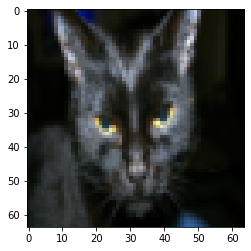

In [ ]:
index = 25
plt.imshow(train_x_orig[index])
print("y = " + str(train_y_orig[index]) + ". It's a " + classes[train_y_orig[index]].decode("utf-8") +  " picture.")

Flatten the data to convert it into a vector:

In [ ]:
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T   
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T
train_y = train_y_orig.reshape((1, train_y_orig.shape[0]))
test_y = test_y_orig.reshape((1, test_y_orig.shape[0]))

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(12288, 209)
(12288, 50)
(1, 209)
(1, 50)


Standardize the data set:

In [ ]:
train_x = train_x/255. 
test_x = test_x/255.

The sigmoid function for binary classification:

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

The parameters are initialized with zeros.

In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

Forward propagation, Cost computation and gradients computation:

In [ ]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X)+b)
    cost = (-1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)

    grads = {"dw": dw, "db": db}
    return grads, cost


Gradient descent algorithm:

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b = b - learning_rate*db

        if i % 100 == 0:
            costs.append(cost)
            print('Cost after %i iterations = %f' %(i, cost))

    params = {"w": w, "b": b}
    grads = {"dw": dw,"db": db}
    return params, grads, costs


Test the trained model on test set:

In [ ]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    pred = sigmoid(np.dot(w.T, X)+b)

    for i in range(pred.shape[1]):
        if pred[0][i] <= 0.5:
            pred[0][i] = 0
        else:
            pred[0][i] = 1

    Y_prediction = pred
    return Y_prediction

Finally, bring all the above defined functions together:

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs, "Y_prediction_test": Y_prediction_test,  "Y_prediction_train" : Y_prediction_train, 
         "w" : w, "b" : b, "learning_rate" : learning_rate, "num_iterations": num_iterations}
    
    return d

d = model(train_x, train_y, test_x, test_y, num_iterations = 2000, learning_rate = 0.005)

Cost after 0 iterations = 0.693147
Cost after 100 iterations = 0.584508
Cost after 200 iterations = 0.466949
Cost after 300 iterations = 0.376007
Cost after 400 iterations = 0.331463
Cost after 500 iterations = 0.303273
Cost after 600 iterations = 0.279880
Cost after 700 iterations = 0.260042
Cost after 800 iterations = 0.242941
Cost after 900 iterations = 0.228004
Cost after 1000 iterations = 0.214820
Cost after 1100 iterations = 0.203078
Cost after 1200 iterations = 0.192544
Cost after 1300 iterations = 0.183033
Cost after 1400 iterations = 0.174399
Cost after 1500 iterations = 0.166521
Cost after 1600 iterations = 0.159305
Cost after 1700 iterations = 0.152667
Cost after 1800 iterations = 0.146542
Cost after 1900 iterations = 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a cat picture.


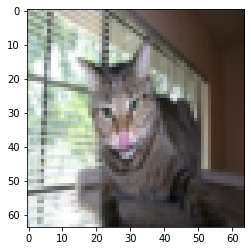

In [ ]:
index = 20
plt.imshow(test_x_orig[index])
Y_pred_test = np.squeeze(d["Y_prediction_test"])
print ("y = " + str(test_y_orig[index]) + ", you predicted that it is a " + classes[int(Y_pred_test[index])].decode("utf-8") +  " picture.")

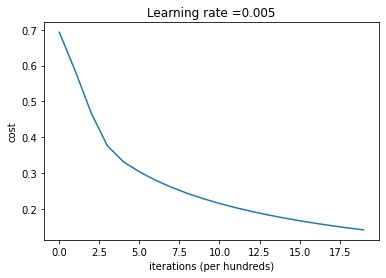

In [ ]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()